   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

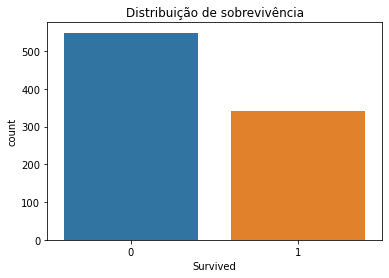

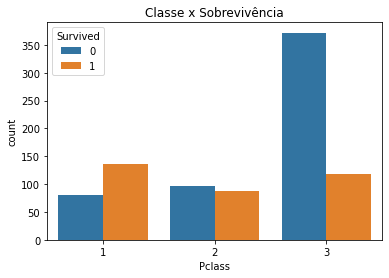

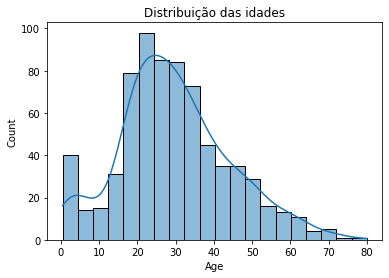

[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [4]:
#Objetivo: 
#Prever quem sobreviveu ao naufrágio com base nos dados demográficos e sociais dos passageiros usando Machine Learning.

# 1. Importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 2. Carregar os dados
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 3. Visão geral
print(df.head())
print(df.info())
print(df.describe())

# 4. Análise visual
sns.countplot(x='Survived', data=df)
plt.title('Distribuição de sobrevivência')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Classe x Sobrevivência')
plt.show()

sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribuição das idades')
plt.show()

# 5. Tratamento de dados
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Transformar variáveis categóricas
df = pd.get_dummies(df, drop_first=True)

# 6. Separar X e y
X = df.drop('Survived', axis=1)
y = df['Survived']

# 7. Treinar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 8. Avaliação
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))